# Airbnb Price prediction model using feature selection methods.

Connecting to goggle drive

In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the data

In [3]:
lon_listings= pd.read_csv('/gdrive/MyDrive/Practicum/Datasets/London-2021/lon_listings.csv')

In [4]:
lon_listings.shape

(66641, 74)

##Data Understanding and Cleaning

In [5]:
lon_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66641 entries, 0 to 66640
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            66641 non-null  int64  
 1   listing_url                                   66641 non-null  object 
 2   scrape_id                                     66641 non-null  int64  
 3   last_scraped                                  66641 non-null  object 
 4   name                                          66617 non-null  object 
 5   description                                   64297 non-null  object 
 6   neighborhood_overview                         39967 non-null  object 
 7   picture_url                                   66641 non-null  object 
 8   host_id                                       66641 non-null  int64  
 9   host_url                                      66641 non-null 

Deleting unwanted columns which are not required for predicting prices

In [6]:
unwanted_columns = ['id', 
                   'calendar_updated',
                    'host_location',
                   'listing_url', 
                   'scrape_id', 
                   'host_id',
                   'picture_url', 
                   'host_url', 
                   'host_thumbnail_url', 
                   'host_picture_url', 'host_name','license','name', 'last_scraped','availability_365', 'host_listings_count','host_acceptance_rate','host_about','neighbourhood_group_cleansed','neighborhood_overview' ,'bathrooms','review_scores_accuracy','review_scores_rating','host_neighbourhood','neighbourhood','minimum_minimum_nights','review_scores_accuracy', 'maximum_minimum_nights', 'maximum_maximum_nights', 'minimum_maximum_nights', 'availability_30', 'availability_60', 'calendar_last_scraped', 'number_of_reviews_l30d', 'first_review','last_review', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month']
lon_listings.drop(unwanted_columns, axis=1, inplace=True)

In [7]:
lon_listings.shape

(66641, 33)

Checking the target column "PRICE"

In [8]:
lon_listings.price

0         $65.00
1         $75.00
2        $265.00
3        $150.00
4         $29.00
          ...   
66636    $120.00
66637    $288.00
66638    $104.00
66639    $402.00
66640     $70.00
Name: price, Length: 66641, dtype: object

In [9]:
#removing special characters
lon_listings['price'] = lon_listings['price'].replace({r'\$':'', r'\,':''}, regex = True)
lon_listings.price

0         65.00
1         75.00
2        265.00
3        150.00
4         29.00
          ...  
66636    120.00
66637    288.00
66638    104.00
66639    402.00
66640     70.00
Name: price, Length: 66641, dtype: object

In [10]:
#converting into float datatype
lon_listings['price'] = lon_listings['price'].astype(np.float)
lon_listings.price

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


0         65.0
1         75.0
2        265.0
3        150.0
4         29.0
         ...  
66636    120.0
66637    288.0
66638    104.0
66639    402.0
66640     70.0
Name: price, Length: 66641, dtype: float64

Dealing with missing data

In [11]:
lon_listings.isnull().sum().sort_values(ascending=False)

host_response_time                              34334
host_response_rate                              34334
bedrooms                                         4017
beds                                             3646
description                                      2344
bathrooms_text                                    244
host_total_listings_count                          59
host_has_profile_pic                               59
host_identity_verified                             59
host_since                                         59
host_is_superhost                                  59
minimum_nights_avg_ntm                              3
maximum_nights_avg_ntm                              3
calculated_host_listings_count_private_rooms        0
calculated_host_listings_count_entire_homes         0
calculated_host_listings_count                      0
instant_bookable                                    0
number_of_reviews_ltm                               0
number_of_reviews           

In [12]:
#checking % of missing values
missing_percent_lon = lon_listings.isnull().sum(axis =0) /lon_listings.shape[0] *100
missing_percent_lon

description                                      3.517354
host_since                                       0.088534
host_response_time                              51.520836
host_response_rate                              51.520836
host_is_superhost                                0.088534
host_total_listings_count                        0.088534
host_verifications                               0.000000
host_has_profile_pic                             0.088534
host_identity_verified                           0.088534
neighbourhood_cleansed                           0.000000
latitude                                         0.000000
longitude                                        0.000000
property_type                                    0.000000
room_type                                        0.000000
accommodates                                     0.000000
bathrooms_text                                   0.366141
bedrooms                                         6.027821
beds          

(array([29.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([ 0.        ,  5.15208355, 10.3041671 , 15.45625066, 20.60833421,
        25.76041776, 30.91250131, 36.06458487, 41.21666842, 46.36875197,
        51.52083552]),
 <a list of 10 Patch objects>)

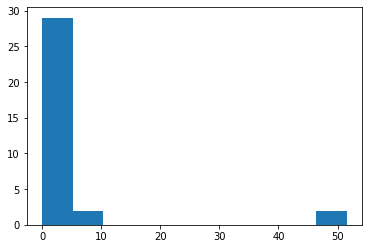

In [13]:
import matplotlib.pyplot as plt
plt.hist(missing_percent_lon)

From the histogram of number of missing value across columns, I decide to drop all the columns with more than 20% of samples are missing

In [14]:
# get the list of all columns with more than 20% samples has missing value 
col_drop_lon = missing_percent_lon[missing_percent_lon > 20].index
col_drop_lon

Index(['host_response_time', 'host_response_rate'], dtype='object')

In [15]:
# drop those columns 
lon_listings = lon_listings.drop(col_drop_lon, axis =1 )

In [16]:
# look at the data with few missing value 
few_missing_col_lon = missing_percent_lon[(missing_percent_lon>0) & (missing_percent_lon <0.2)].index.tolist()
few_missing_col_lon

#listings[few_missing_col]

['host_since',
 'host_is_superhost',
 'host_total_listings_count',
 'host_has_profile_pic',
 'host_identity_verified',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm']

Imputation for missing value.
For numeric columns, I will do imputation the missing value with the mean.

For categorical columns I will do imputation the missing value with the mode.

In [17]:
lon_listings.isnull().sum().sort_values(ascending=False)

bedrooms                                        4017
beds                                            3646
description                                     2344
bathrooms_text                                   244
host_total_listings_count                         59
host_has_profile_pic                              59
host_identity_verified                            59
host_is_superhost                                 59
host_since                                        59
minimum_nights_avg_ntm                             3
maximum_nights_avg_ntm                             3
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count                     0
instant_bookable                                   0
number_of_reviews_ltm                              0
number_of_reviews                                  0
availability_90                                    0
has_availability                              

In [18]:
lon_listings.dtypes

description                                      object
host_since                                       object
host_is_superhost                                object
host_total_listings_count                       float64
host_verifications                               object
host_has_profile_pic                             object
host_identity_verified                           object
neighbourhood_cleansed                           object
latitude                                        float64
longitude                                       float64
property_type                                    object
room_type                                        object
accommodates                                      int64
bathrooms_text                                   object
bedrooms                                        float64
beds                                            float64
amenities                                        object
price                                           

In [19]:
lon_listings.bathrooms_text

0           1 shared bath
1                  1 bath
2                 2 baths
3          1 private bath
4        1.5 shared baths
               ...       
66636              1 bath
66637           2.5 baths
66638             2 baths
66639           2.5 baths
66640              1 bath
Name: bathrooms_text, Length: 66641, dtype: object

In [20]:
#extracted bath numbers from bathrooms_text 
lon_listings["bath"] = lon_listings["bathrooms_text"].str.extract("(\d*\.?\d+)", expand=True)

In [21]:
#drop bathroom_text
lon_listings = lon_listings.drop(columns=['bathrooms_text'])

In [22]:
#converting bath from integer to float
lon_listings['bath'] = lon_listings['bath'].astype(float)

In [23]:
lon_listings.bath

0        1.0
1        1.0
2        2.0
3        1.0
4        1.5
        ... 
66636    1.0
66637    2.5
66638    2.0
66639    2.5
66640    1.0
Name: bath, Length: 66641, dtype: float64

In [24]:
from sklearn.impute import SimpleImputer

imputer1 = SimpleImputer(strategy = 'mean')

numeric_col = ['beds','bedrooms','host_total_listings_count','minimum_nights_avg_ntm','maximum_nights_avg_ntm', 'bath']
 
data = imputer1.fit_transform(lon_listings[numeric_col])

lon_listings[numeric_col] = pd.DataFrame(data, columns = numeric_col)

lon_listings[numeric_col].head()

,beds,bedrooms,host_total_listings_count,minimum_nights_avg_ntm,maximum_nights_avg_ntm,bath
0,1.757981,1.0,3.0,1.0,29.0,1.0
1,1.000000,1.0,1.0,3.0,50.0,1.0
2,3.000000,3.0,18.0,4.0,365.0,2.0
3,1.000000,1.0,3.0,3.0,21.0,1.0
4,1.757981,1.0,3.0,10.0,1125.0,1.5


In [25]:
#categorical
categorical_col = ['host_is_superhost','host_identity_verified', 'host_has_profile_pic']

lon_listings[categorical_col].head()

,host_is_superhost,host_identity_verified,host_has_profile_pic
0,f,t,t
1,f,t,t
2,f,t,t
3,f,t,t
4,f,t,t


In [26]:
# initiate the imputer 

imputer2 = SimpleImputer(strategy = 'most_frequent')

data = imputer2.fit_transform(lon_listings[categorical_col])

# transform the array back to DataFrame 

lon_listings[categorical_col] = pd.DataFrame(data, columns = categorical_col)

In [27]:
lon_listings.isnull().sum().sort_values(ascending=False)

description                                     2344
host_since                                        59
price                                              0
calculated_host_listings_count_shared_rooms        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count                     0
instant_bookable                                   0
number_of_reviews_ltm                              0
number_of_reviews                                  0
availability_90                                    0
has_availability                                   0
maximum_nights_avg_ntm                             0
minimum_nights_avg_ntm                             0
maximum_nights                                     0
minimum_nights                                     0
amenities                                          0
beds                                               0
bedrooms                                      

In [28]:
lon_listings = lon_listings.drop(columns=['description', 'host_since', 'host_verifications', 'amenities'])


In [29]:
lon_listings.isnull().sum()

host_is_superhost                               0
host_total_listings_count                       0
host_has_profile_pic                            0
host_identity_verified                          0
neighbourhood_cleansed                          0
latitude                                        0
longitude                                       0
property_type                                   0
room_type                                       0
accommodates                                    0
bedrooms                                        0
beds                                            0
price                                           0
minimum_nights                                  0
maximum_nights                                  0
minimum_nights_avg_ntm                          0
maximum_nights_avg_ntm                          0
has_availability                                0
availability_90                                 0
number_of_reviews                               0


## EXPLORATORY ANALYSIS

In [30]:
# Number of listings per neighbourhood
lon_listings.groupby("neighbourhood_cleansed").agg({'calculated_host_listings_count':'count'}).sort_values(by="calculated_host_listings_count", ascending=False).reset_index()[:10]

,neighbourhood_cleansed,calculated_host_listings_count
0,Westminster,7022
1,Tower Hamlets,5538
2,Hackney,5117
3,Camden,4527
4,Kensington and Chelsea,4508
5,Southwark,3929
6,Islington,3879
7,Lambeth,3727
8,Wandsworth,3442
9,Hammersmith and Fulham,2953


In [31]:
def binary_count_and_price_plot(col, figsize=(8,3)):

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    fig.suptitle(col, fontsize=16, y=1)
    plt.subplots_adjust(top=0.80)
    
    lon_listings.groupby(col).size().plot(kind='bar', ax=ax1, color=['#ff5a5f', '#00a698'])
    ax1.set_xticklabels(labels=['false', 'true'], rotation=0)
    ax1.set_title('Category count')
    ax1.set_xlabel('')
    
    lon_listings.groupby(col).price.median().plot(kind='bar', ax=ax2, color=['#ff5a5f', '#00a698'])
    ax2.set_xticklabels(labels=['false', 'true'], rotation=0)
    ax2.set_title('Median price ($)')
    ax2.set_xlabel('')
    
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Price per night ($)')

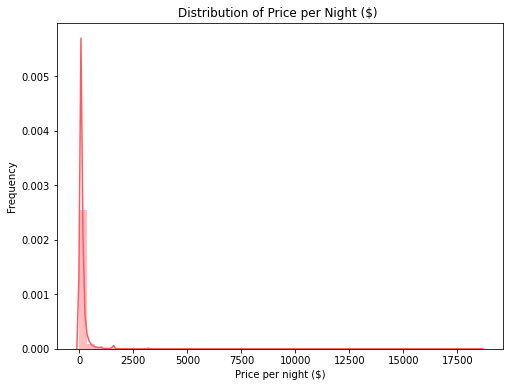

In [32]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.distplot(lon_listings['price'], color='#ff5a5f', ax=ax)
plt.title("Distribution of Price per Night ($) ")
plt.ylabel('Frequency')
plt.xlabel("Price per night ($)")

In [33]:
lon_listings['price'].describe()

count    66641.000000
mean       145.207230
std        349.932373
min          0.000000
25%         46.000000
50%         83.000000
75%        145.000000
max      18557.000000
Name: price, dtype: float64

Price per Night
Mean price is 145.20. Data is skewed to the right. Range of price is 0.00, also there are outliers as cost cannot be 0 per night

In [34]:
# Top 3 most expensive listings
lon_listings.sort_values('price', ascending=False)[:3]

,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,...,has_availability,availability_90,number_of_reviews,number_of_reviews_ltm,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,bath
25474,f,1.0,t,t,Southwark,51.50060,-0.06242,Entire residential home,Entire home/apt,7,...,t,90,51,0,t,1,1,0,0,2.0
17444,f,43.0,t,t,City of London,51.51408,-0.08376,Entire rental unit,Entire home/apt,4,...,t,90,64,0,t,43,34,9,0,1.0
41488,f,43.0,t,t,Westminster,51.51385,-0.13185,Entire rental unit,Entire home/apt,3,...,t,90,12,0,t,43,34,9,0,1.0


In [35]:
# Top 3 least expensive listings
lon_listings.sort_values('price')[:3]


,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,...,has_availability,availability_90,number_of_reviews,number_of_reviews_ltm,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,bath
65798,f,0.0,t,t,Hackney,51.55663,-0.03845,Private room in residential home,Private room,2,...,t,43,0,0,f,2,0,2,0,1.500000
50849,f,0.0,f,t,Westminster,51.51181,-0.17742,Room in hotel,Hotel room,3,...,t,0,0,0,f,1,0,0,0,1.307589
50339,f,2.0,t,t,Kensington and Chelsea,51.49190,-0.18812,Room in serviced apartment,Hotel room,4,...,t,0,1,1,f,1,0,0,0,1.307589


In [36]:
abc = lon_listings.groupby('accommodates').agg({'price':'median','calculated_host_listings_count':'count'}).reset_index()
abc.head()

,accommodates,price,calculated_host_listings_count
0,0,0.0,9
1,1,39.0,10176
2,2,64.0,28912
3,3,94.0,4508
4,4,120.0,12581


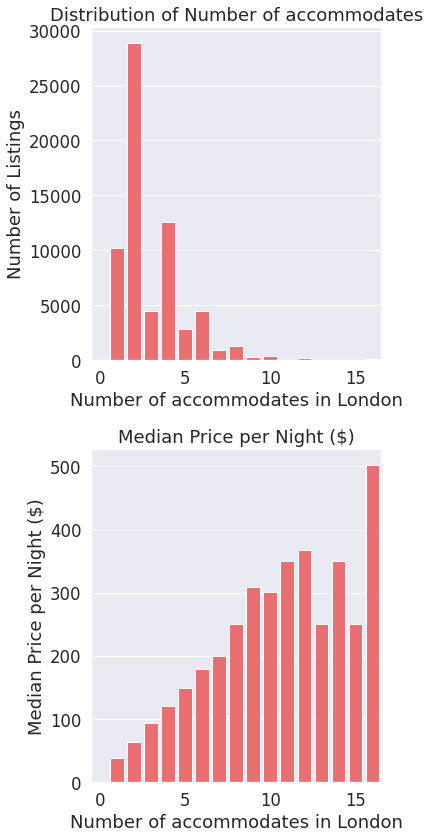

In [37]:
sns.set(font_scale = 1.5)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 12))

# plot a bar chart
plot = sns.barplot(
    y=abc['calculated_host_listings_count'], 
    x=abc['accommodates'],  
    estimator=sum, 
    ci=None, 
    color='#ff5a5f',
    ax=ax1);

ax1.set_title('Distribution of Number of accommodates')
ax1.set_xlabel('Number of accommodates in London')
ax1.set_ylabel('Number of Listings')

for ind, label in enumerate(plot.get_xticklabels()):
    if ind % 5 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

plot = sns.barplot(
    y=abc['price'], 
    x=abc['accommodates'],  
    estimator=sum, 
    ci=None, 
    color='#ff5a5f',
    ax=ax2);

ax2.set_title('Median Price per Night ($)')
ax2.set_xlabel('Number of accommodates in London')
ax2.set_ylabel('Median Price per Night ($)')

fig.tight_layout()

for ind, label in enumerate(plot.get_xticklabels()):
    if ind % 5 == 0:  
        label.set_visible(True)
    else:
        label.set_visible(False)

In [38]:
xyz = lon_listings.groupby('beds').agg({'price':'median','calculated_host_listings_count':'count'}).reset_index()
xyz.head()

,beds,price,calculated_host_listings_count
0,1.000000,59.0,36660
1,1.757981,60.0,3646
2,2.000000,111.0,15118
3,3.000000,150.0,5960
4,4.000000,190.0,2916


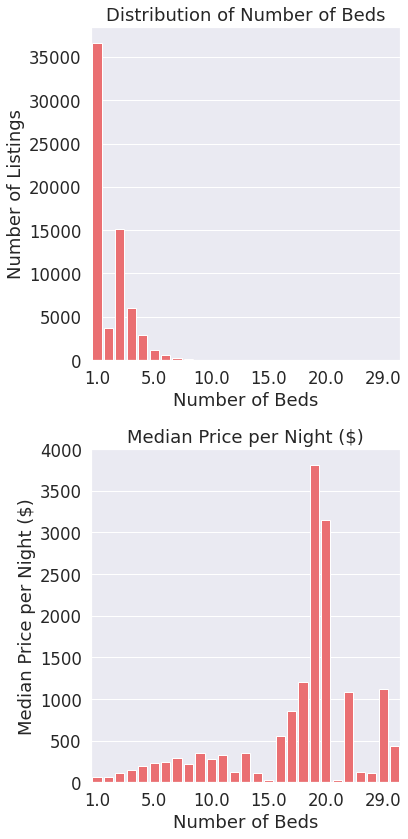

In [39]:
sns.set(font_scale = 1.5)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 12))

# plot a bar chart
plot = sns.barplot(
    y=xyz['calculated_host_listings_count'], 
    x=xyz['beds'],  
    estimator=sum, 
    ci=None, 
    color='#ff5a5f',
    ax=ax1);

for ind, label in enumerate(plot.get_xticklabels()):
    if ind % 5 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

ax1.set_title('Distribution of Number of Beds')
ax1.set_xlabel('Number of Beds')
ax1.set_ylabel('Number of Listings')

plot = sns.barplot(
    y=xyz['price'], 
    x=xyz['beds'],  
    estimator=sum, 
    ci=None, 
    color='#ff5a5f',
    ax=ax2);

ax2.set_title('Median Price per Night ($)')
ax2.set_xlabel('Number of Beds')
ax2.set_ylabel('Median Price per Night ($)')

for ind, label in enumerate(plot.get_xticklabels()):
    if ind % 5 == 0:  
        label.set_visible(True)
    else:
        label.set_visible(False)
        
fig.tight_layout()

In [40]:
df1 = lon_listings.groupby('bedrooms').agg({'price':'median','calculated_host_listings_count':'count'}).reset_index()
df1

,bedrooms,price,calculated_host_listings_count
0,1.000000,60.0,42746
1,1.489253,77.0,4017
2,2.000000,137.0,12817
3,3.000000,190.0,4500
4,4.000000,250.0,1791
5,5.000000,333.0,579
6,6.000000,399.5,132
7,7.000000,571.5,28
8,8.000000,886.5,10
9,9.000000,479.5,4


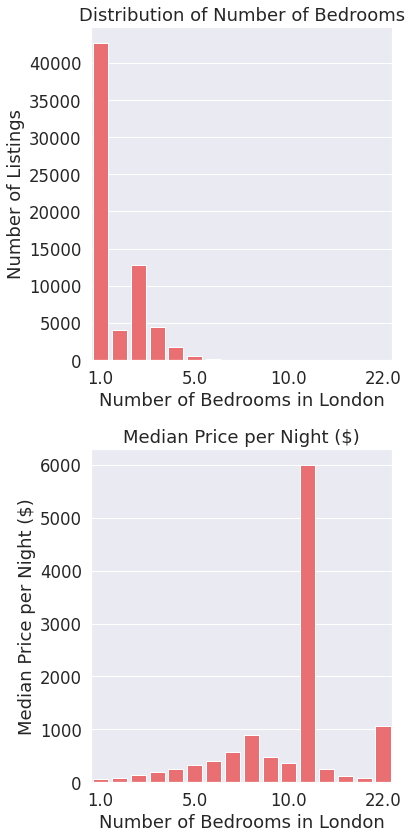

In [41]:
sns.set(font_scale = 1.5)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 12))

# plot a bar chart
plot = sns.barplot(
    y=df1['calculated_host_listings_count'], 
    x=df1['bedrooms'],  
    estimator=sum, 
    ci=None, 
    color='#ff5a5f',
    ax=ax1);

ax1.set_title('Distribution of Number of Bedrooms')
ax1.set_xlabel('Number of Bedrooms in London')
ax1.set_ylabel('Number of Listings')

for ind, label in enumerate(plot.get_xticklabels()):
    if ind % 5 == 0: 
        label.set_visible(True)
    else:
        label.set_visible(False)

plot = sns.barplot(
    y=df1['price'], 
    x=df1['bedrooms'],  
    estimator=sum, 
    ci=None, 
    color='#ff5a5f',
    ax=ax2);

ax2.set_title('Median Price per Night ($)')
ax2.set_xlabel('Number of Bedrooms in London')
ax2.set_ylabel('Median Price per Night ($)')

for ind, label in enumerate(plot.get_xticklabels()):
    if ind % 5 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

fig.tight_layout()

In [42]:
df2=lon_listings.query(' bedrooms==11')['property_type']
print(df2)

59345    Entire serviced apartment
Name: property_type, dtype: object


In [43]:
df2=lon_listings.query(' bedrooms==22')['property_type']
print(df2)

12496    Entire residential home
Name: property_type, dtype: object


In [44]:
df1 = lon_listings.groupby('bath').agg({'price':'median','calculated_host_listings_count':'count'}).reset_index()
df1['bath'] = df1['bath'].round().astype('int64')
df1.head()

,bath,price,calculated_host_listings_count
0,0,50.5,242
1,1,75.0,45564
2,1,50.0,543
3,2,65.0,7596
4,2,150.0,8670


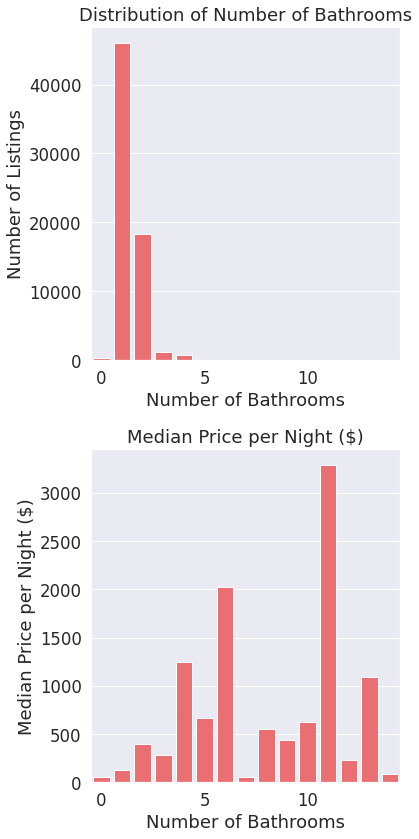

In [45]:
sns.set(font_scale = 1.5)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 12))

# plot a bar chart
plot = sns.barplot(
    y=df1['calculated_host_listings_count'], 
    x=df1['bath'],  
    estimator=sum, 
    ci=None, 
    color='#ff5a5f',
    ax=ax1);

ax1.set_title('Distribution of Number of Bathrooms')
ax1.set_xlabel('Number of Bathrooms')
ax1.set_ylabel('Number of Listings')

for ind, label in enumerate(plot.get_xticklabels()):
    if ind % 5 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

plot = sns.barplot(
    y=df1['price'], 
    x=df1['bath'],  
    estimator=sum, 
    ci=None, 
    color='#ff5a5f',
    ax=ax2);

ax2.set_title('Median Price per Night ($)')
ax2.set_xlabel('Number of Bathrooms')
ax2.set_ylabel('Median Price per Night ($)')

for ind, label in enumerate(plot.get_xticklabels()):
    if ind % 5 == 0:  
        label.set_visible(True)
    else:
        label.set_visible(False)

fig.tight_layout()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


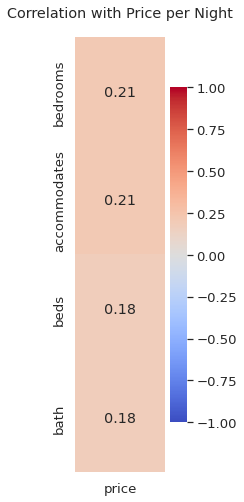

In [46]:
sns.set(font_scale = 1.2)

# Compute correlations
corr = lon_listings[['price','accommodates', 'bedrooms','bath',
          'beds']].corr()

# Exclude duplicate correlations by masking uper right values
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set background color / chart style
sns.set_style(style = 'white')

# Set up  matplotlib figure
f, ax = plt.subplots(figsize=(2, 8))
ax.set_title('Correlation with Price per Night', pad='20')

# Add diverging colormap
cmap = sns.diverging_palette(10, 250, as_cmap=True)

# Draw correlation plot
sns.heatmap(corr[['price']].sort_values(by=['price'],ascending=False)[1:],
            vmin=-1, vmax=1,
            cmap='coolwarm',
            annot=True);

Neighbourhood

In [47]:
df1 = lon_listings.groupby("neighbourhood_cleansed").agg({'calculated_host_listings_count':'count', 'price':'median'}).reset_index()
df1[:5]

,neighbourhood_cleansed,calculated_host_listings_count,price
0,Barking and Dagenham,410,50.0
1,Barnet,1523,64.0
2,Bexley,285,45.0
3,Brent,1868,69.0
4,Bromley,546,55.0


In [48]:
# Top 5 neighbourhood with lowest price_per_night (where count of listings>10)
df3 = df1[df1['calculated_host_listings_count'] >= 10].sort_values(by="price").reset_index()[:5]
df3[:5]

,index,neighbourhood_cleansed,calculated_host_listings_count,price
0,2,Bexley,285,45.0
1,7,Croydon,1055,46.0
2,0,Barking and Dagenham,410,50.0
3,28,Sutton,281,50.0
4,25,Redbridge,617,50.0


In [49]:
# Top 5 neighbourhood with highest price_per_night (where count of listings>10)
df2 = df1[df1['calculated_host_listings_count'] >= 10].sort_values(by="price", ascending=False).reset_index()[:5]
df2

,index,neighbourhood_cleansed,calculated_host_listings_count,price
0,6,City of London,384,149.0
1,19,Kensington and Chelsea,4508,145.0
2,32,Westminster,7022,140.0
3,5,Camden,4527,100.0
4,12,Hammersmith and Fulham,2953,97.0


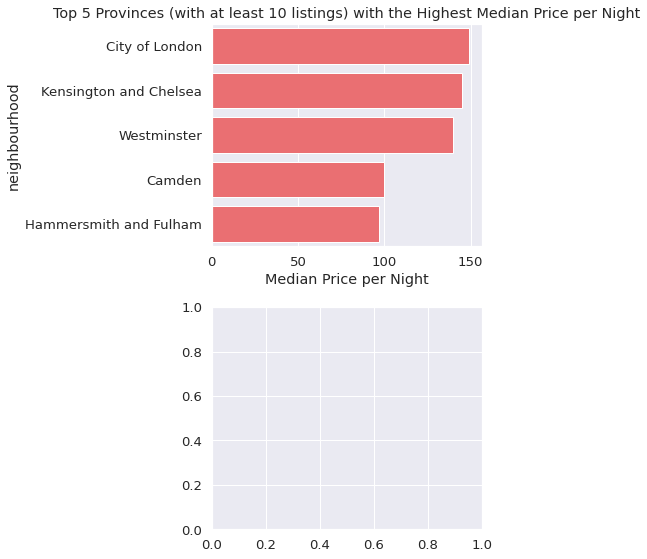

In [50]:
sns.set(font_scale = 1.2)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))

# plot a bar chart
sns.barplot(
    y=df2['neighbourhood_cleansed'], 
    x=df2['price'],  
    estimator=sum, 
    ci=None, 
    color='#ff5a5f',
    ax=ax1);

ax1.set_title('Top 5 Provinces (with at least 10 listings) with the Highest Median Price per Night')
ax1.set_xlabel('Median Price per Night')
ax1.set_ylabel('neighbourhood')


fig.tight_layout()

In [51]:
# Top 5 most expensive Airbnb types
df1 = lon_listings.groupby("property_type").agg({'price':'median','calculated_host_listings_count':'count'}).sort_values(by="price", ascending=False).reset_index()
df1[:5]


,property_type,price,calculated_host_listings_count
0,Entire villa,672.0,24
1,Dome house,641.0,1
2,Private room in castle,350.0,1
3,Lighthouse,343.0,1
4,Yurt,300.0,1


In [52]:
# Top 5 most expensive Airbnb types with more than 10 listings
df2 = df1[df1['calculated_host_listings_count']>=10].sort_values(by="price", ascending= False)[:5]
df2

,property_type,price,calculated_host_listings_count
0,Entire villa,672.0,24
5,Entire serviced apartment,204.5,1206
8,Entire townhouse,190.0,968
9,Room in serviced apartment,189.0,89
10,Entire residential home,176.0,5119


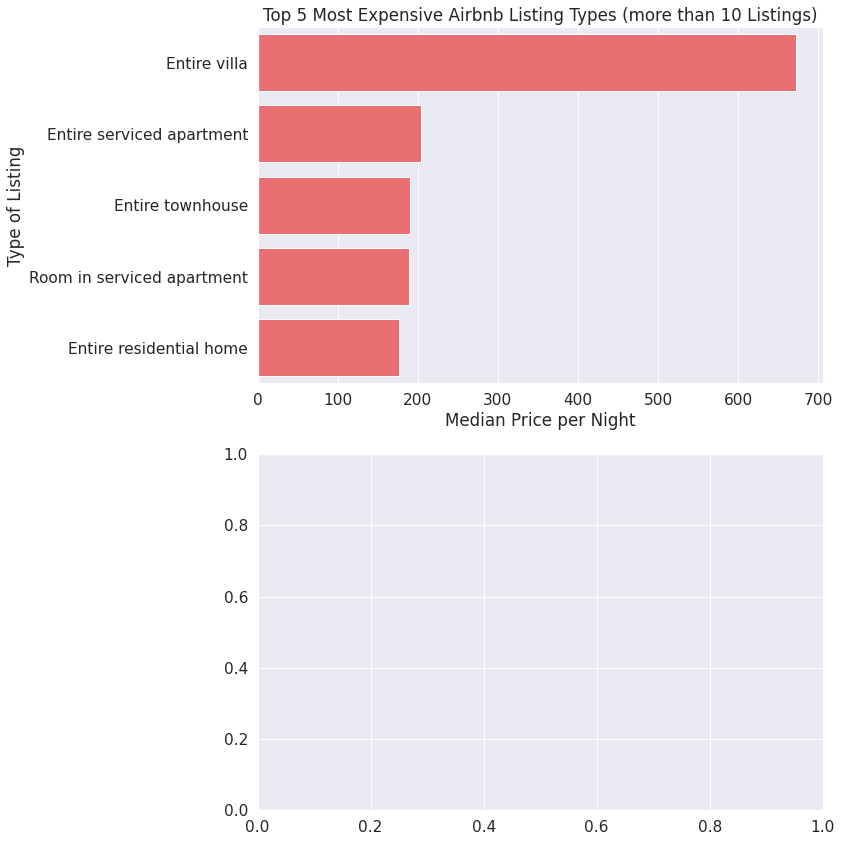

In [53]:
sns.set(font_scale = 1.4)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# plot a bar chart
sns.barplot(
    y=df2['property_type'], 
    x=df2['price'],  
    estimator=sum, 
    ci=None, 
    color='#ff5a5f',
    ax=ax1);

ax1.set_title('Top 5 Most Expensive Airbnb Listing Types (more than 10 Listings)')
ax1.set_xlabel('Median Price per Night')
ax1.set_ylabel('Type of Listing')



fig.tight_layout()

##Feature Engineering

Encoding for categorical variables

In [54]:
df_num = lon_listings.select_dtypes(exclude=[np.number])
df_num

,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,has_availability,instant_bookable
0,f,t,t,Islington,Private room in rental unit,Private room,t,f
1,f,t,t,Kensington and Chelsea,Entire rental unit,Entire home/apt,t,f
2,f,t,t,Westminster,Entire rental unit,Entire home/apt,t,f
3,f,t,t,Hammersmith and Fulham,Private room in townhouse,Private room,t,f
4,f,t,t,Barnet,Private room in residential home,Private room,t,t
...,...,...,...,...,...,...,...,...
66636,t,t,t,Croydon,Entire condominium (condo),Entire home/apt,t,f
66637,f,t,t,Ealing,Entire condominium (condo),Entire home/apt,t,t
66638,t,t,t,Haringey,Entire bungalow,Entire home/apt,t,t
66639,f,t,t,Kensington and Chelsea,Entire rental unit,Entire home/apt,t,t


# Encode binary outcomes 

In [55]:
# Encode binary outcomes 
binary_cols=['instant_bookable','has_availability', 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified']
for col in binary_cols:
    lon_listings[col]  = lon_listings[col].map({'t': 1, 'f': 0 })

# Encode multi-categorical outcomes 
multi_cols=['neighbourhood_cleansed','property_type','room_type']
lon_listings =pd.get_dummies(data=lon_listings, columns=multi_cols,drop_first=True)

In [56]:
lon_listings

,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bedrooms,beds,price,...,property_type_Shared room in residential home,property_type_Shared room in serviced apartment,property_type_Shared room in townhouse,property_type_Shared room in villa,property_type_Tent,property_type_Tiny house,property_type_Yurt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,0,3.0,1,1,51.568610,-0.112700,2,1.0,1.757981,65.0,...,0,0,0,0,0,0,0,0,1,0
1,0,1.0,1,1,51.487800,-0.168130,2,1.0,1.000000,75.0,...,0,0,0,0,0,0,0,0,0,0
2,0,18.0,1,1,51.521950,-0.140940,6,3.0,3.000000,265.0,...,0,0,0,0,0,0,0,0,0,0
3,0,3.0,1,1,51.479350,-0.197430,2,1.0,1.000000,150.0,...,0,0,0,0,0,0,0,0,1,0
4,0,3.0,1,1,51.574380,-0.210810,2,1.0,1.757981,29.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66636,1,13.0,1,1,51.419345,-0.079681,6,3.0,3.000000,120.0,...,0,0,0,0,0,0,0,0,0,0
66637,0,9.0,1,1,51.502002,-0.276895,8,3.0,4.000000,288.0,...,0,0,0,0,0,0,0,0,0,0
66638,1,5.0,1,1,51.599308,-0.114763,4,2.0,1.000000,104.0,...,0,0,0,0,0,0,0,0,0,0
66639,0,4.0,1,1,51.510407,-0.193729,4,2.0,2.000000,402.0,...,0,0,0,0,0,0,0,0,0,0


#Outliers check

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


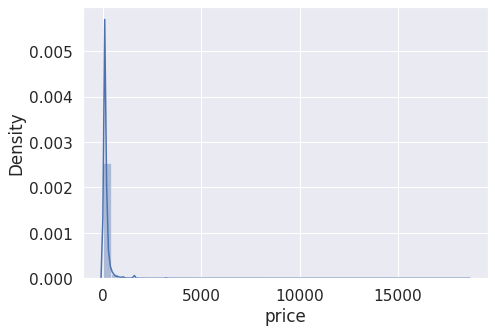

In [57]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(lon_listings['price'])
plt.show()

In [58]:
print("Mean value of cgpa",lon_listings['price'].mean())
print("Std value of cgpa",lon_listings['price'].std())
print("Min value of cgpa",lon_listings['price'].min())
print("Max value of cgpa",lon_listings['price'].max())

Mean value of cgpa 145.20722978346663
Std value of cgpa 349.93237346485944
Min value of cgpa 0.0
Max value of cgpa 18557.0


In [59]:
# Finding the boundary values
print("Highest allowed",lon_listings['price'].mean() + 3*lon_listings['price'].std())
print("Lowest allowed",lon_listings['price'].mean() - 3*lon_listings['price'].std())

Highest allowed 1195.004350178045
Lowest allowed -904.5898906111117


In [60]:
# Finding the outliers

lon_listings[(lon_listings['price'] > 1086.15) | (lon_listings['price'] < -744.44)]

,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bedrooms,beds,price,...,property_type_Shared room in residential home,property_type_Shared room in serviced apartment,property_type_Shared room in townhouse,property_type_Shared room in villa,property_type_Tent,property_type_Tiny house,property_type_Yurt,room_type_Hotel room,room_type_Private room,room_type_Shared room
131,0,4.0,1,1,51.506120,-0.140290,6,3.0,1.000000,1300.0,...,0,0,0,0,0,0,0,0,0,0
488,0,1.0,1,0,51.469290,-0.008340,6,3.0,3.000000,1500.0,...,0,0,0,0,0,0,0,0,0,0
599,0,3.0,1,1,51.515120,-0.208140,9,4.0,6.000000,2000.0,...,0,0,0,0,0,0,0,0,0,0
1561,0,1.0,1,1,51.506900,-0.242930,2,1.0,1.000000,1150.0,...,0,0,0,0,0,0,0,0,1,0
1771,0,1.0,1,0,51.499140,-0.047720,1,1.0,1.000000,1100.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66156,0,1.0,1,1,51.526057,-0.182884,4,2.0,1.757981,1200.0,...,0,0,0,0,0,0,0,0,0,0
66188,0,7.0,1,0,51.497082,-0.164986,6,3.0,3.000000,1250.0,...,0,0,0,0,0,0,0,0,0,0
66189,0,7.0,1,0,51.497080,-0.165070,6,3.0,3.000000,1459.0,...,0,0,0,0,0,0,0,0,0,0
66495,0,6.0,1,1,51.496349,-0.138260,16,5.0,7.000000,2400.0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
# Trimming
lon_listings = lon_listings[(lon_listings['price'] < 1086) & (lon_listings['price'] > -744.44)]
lon_listings

,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bedrooms,beds,price,...,property_type_Shared room in residential home,property_type_Shared room in serviced apartment,property_type_Shared room in townhouse,property_type_Shared room in villa,property_type_Tent,property_type_Tiny house,property_type_Yurt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,0,3.0,1,1,51.568610,-0.112700,2,1.0,1.757981,65.0,...,0,0,0,0,0,0,0,0,1,0
1,0,1.0,1,1,51.487800,-0.168130,2,1.0,1.000000,75.0,...,0,0,0,0,0,0,0,0,0,0
2,0,18.0,1,1,51.521950,-0.140940,6,3.0,3.000000,265.0,...,0,0,0,0,0,0,0,0,0,0
3,0,3.0,1,1,51.479350,-0.197430,2,1.0,1.000000,150.0,...,0,0,0,0,0,0,0,0,1,0
4,0,3.0,1,1,51.574380,-0.210810,2,1.0,1.757981,29.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66636,1,13.0,1,1,51.419345,-0.079681,6,3.0,3.000000,120.0,...,0,0,0,0,0,0,0,0,0,0
66637,0,9.0,1,1,51.502002,-0.276895,8,3.0,4.000000,288.0,...,0,0,0,0,0,0,0,0,0,0
66638,1,5.0,1,1,51.599308,-0.114763,4,2.0,1.000000,104.0,...,0,0,0,0,0,0,0,0,0,0
66639,0,4.0,1,1,51.510407,-0.193729,4,2.0,2.000000,402.0,...,0,0,0,0,0,0,0,0,0,0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


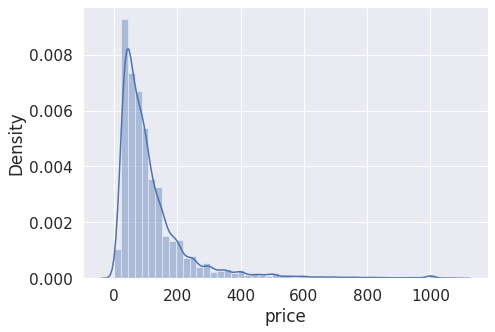

In [62]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(lon_listings['price'])
plt.show()

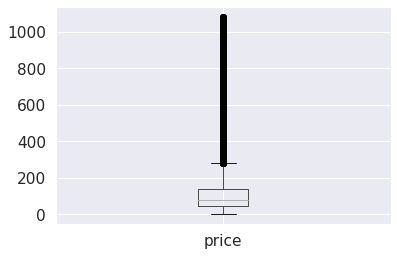

In [63]:
boxplot = lon_listings.boxplot(column=['price'])

In [64]:
lon_listings

,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bedrooms,beds,price,...,property_type_Shared room in residential home,property_type_Shared room in serviced apartment,property_type_Shared room in townhouse,property_type_Shared room in villa,property_type_Tent,property_type_Tiny house,property_type_Yurt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,0,3.0,1,1,51.568610,-0.112700,2,1.0,1.757981,65.0,...,0,0,0,0,0,0,0,0,1,0
1,0,1.0,1,1,51.487800,-0.168130,2,1.0,1.000000,75.0,...,0,0,0,0,0,0,0,0,0,0
2,0,18.0,1,1,51.521950,-0.140940,6,3.0,3.000000,265.0,...,0,0,0,0,0,0,0,0,0,0
3,0,3.0,1,1,51.479350,-0.197430,2,1.0,1.000000,150.0,...,0,0,0,0,0,0,0,0,1,0
4,0,3.0,1,1,51.574380,-0.210810,2,1.0,1.757981,29.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66636,1,13.0,1,1,51.419345,-0.079681,6,3.0,3.000000,120.0,...,0,0,0,0,0,0,0,0,0,0
66637,0,9.0,1,1,51.502002,-0.276895,8,3.0,4.000000,288.0,...,0,0,0,0,0,0,0,0,0,0
66638,1,5.0,1,1,51.599308,-0.114763,4,2.0,1.000000,104.0,...,0,0,0,0,0,0,0,0,0,0
66639,0,4.0,1,1,51.510407,-0.193729,4,2.0,2.000000,402.0,...,0,0,0,0,0,0,0,0,0,0


#Modelling

Splitting Data


In [65]:
# Splitting data into Input and Target Variable

y = lon_listings[['price']]  # target variable i.e diabetic or not
X = lon_listings.drop(['price'], axis=1)  # input variables

In [66]:
# Split into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [67]:
from sklearn.preprocessing import StandardScaler
#Scaler/normalize 
scaler = StandardScaler()
Xn = scaler.fit_transform(X)

In [68]:
X.shape

(65807, 150)

#Filter Method

Step:1 Removing Constant features

In [69]:
# remove constant features
constant_features = [
    feat for feat in X_train.columns if X_train[feat].std() == 0
]
print(constant_features)

X_train.drop(labels=constant_features, axis=1, inplace=True)
X_test.drop(labels=constant_features, axis=1, inplace=True)

X_train.shape, X_test.shape

['property_type_Earth house', 'property_type_Shared room in bus']


((52645, 148), (13162, 148))

Step 2: Removing Quasi-Constant Features

In [70]:
from sklearn.feature_selection import VarianceThreshold

In [71]:
# remove quasi-constant features
sel = VarianceThreshold(threshold=0.01)  # 0.1 indicates 99% of observations approximately

sel.fit(X_train)  # fit finds the features with low variance

sum(sel.get_support()) # how many not quasi-constant?

52

In [72]:
features_to_keep = X_train.columns[sel.get_support()]

In [73]:
# we can then remove the features like this
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

X_train.shape, X_test.shape

((52645, 52), (13162, 52))

Step 3 Removing Duplicate Columns

In [74]:
# sklearn transformations lead to numpy arrays
# here I transform the arrays back to dataframes
# please be mindful of getting the columns assigned
# correctly

X_train= pd.DataFrame(X_train)
X_train.columns = features_to_keep

X_test= pd.DataFrame(X_test)
X_test.columns = features_to_keep

In [75]:
#Remove duplicated features
# check for duplicated features in the training set
duplicated_feat = []
for i in range(0, len(X_train.columns)):
    if i % 10 == 0:  # this helps me understand how the loop is going
        print(i)

    col_1 = X_train.columns[i]

    for col_2 in X_train.columns[i + 1:]:
        if X_train[col_1].equals(X_train[col_2]):
            duplicated_feat.append(col_2)
            
len(duplicated_feat)

0
10
20
30
40
50


0

In [76]:
# remove duplicated features
X_train.drop(labels=duplicated_feat, axis=1, inplace=True)
X_test.drop(labels=duplicated_feat, axis=1, inplace=True)

X_train.shape, X_test.shape

((52645, 52), (13162, 52))

In [77]:
# I keep a copy of the dataset except constant and duplicated variables
# to measure the performance of machine learning models
# at the end of the notebook

X_train_basic_filter = X_train.copy()
X_test_basic_filter = X_test.copy()

In [78]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X_train, 0.8)
print('correlated features: ', len(set(corr_features)) )

correlated features:  4


In [79]:
X_train.drop(labels=corr_features, axis=1, inplace=True)
X_test.drop(labels=corr_features, axis=1, inplace=True)

X_train.shape, X_test.shape

((52645, 48), (13162, 48))

In [80]:
for feat in X_train:
    if X_train[feat].isnull().mean() > 0:
        print(X_train[feat])

In [81]:
for feat in X_test:
    if X_test[feat].isnull().mean() > 0:
        print(X_test[feat])

In [82]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

In [83]:
rfcm = xgb.XGBRegressor().fit(X_train, y_train)

[18:28:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [84]:
y_pred = rfcm.predict(X_test) 

In [85]:
mse = mean_squared_error(y_test, y_pred)
r2= r2_score(y_test, y_pred)
print('Mean squared error after filter method: ', mse)
print('R2 after filter method: ', r2)

Mean squared error after filter method:  6341.649107288598
R2 after filter method:  0.588436094612659


XGBoost Regressor

In [86]:
import xgboost as xgb

In [87]:
# the first step of this procedure consists in building
# a machine learning algorithm using all the available features
# and then determine the importance of the features according
# to the algorithm

# set the seed for reproducibility
seed_val = 1000000000
np.random.seed(seed_val)

# build initial model using all the features
model_all_features = xgb.XGBRegressor(
    nthread=5, max_depth=4, n_estimators=500, learning_rate=0.05)

model_all_features.fit(X_train, y_train)

# calculate the r2 in the test set
y_pred_test = model_all_features.predict(X_test)
mse =mean_squared_error(y_test, y_pred_test)
r2_score_all = r2_score(y_test, y_pred_test)
print('Test all features xgb R2 = %f' % (r2_score_all))
print('Test all features xgb mse = %f' % (mse))

[18:29:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Test all features xgb R2 = 0.636463
Test all features xgb mse = 5601.613955


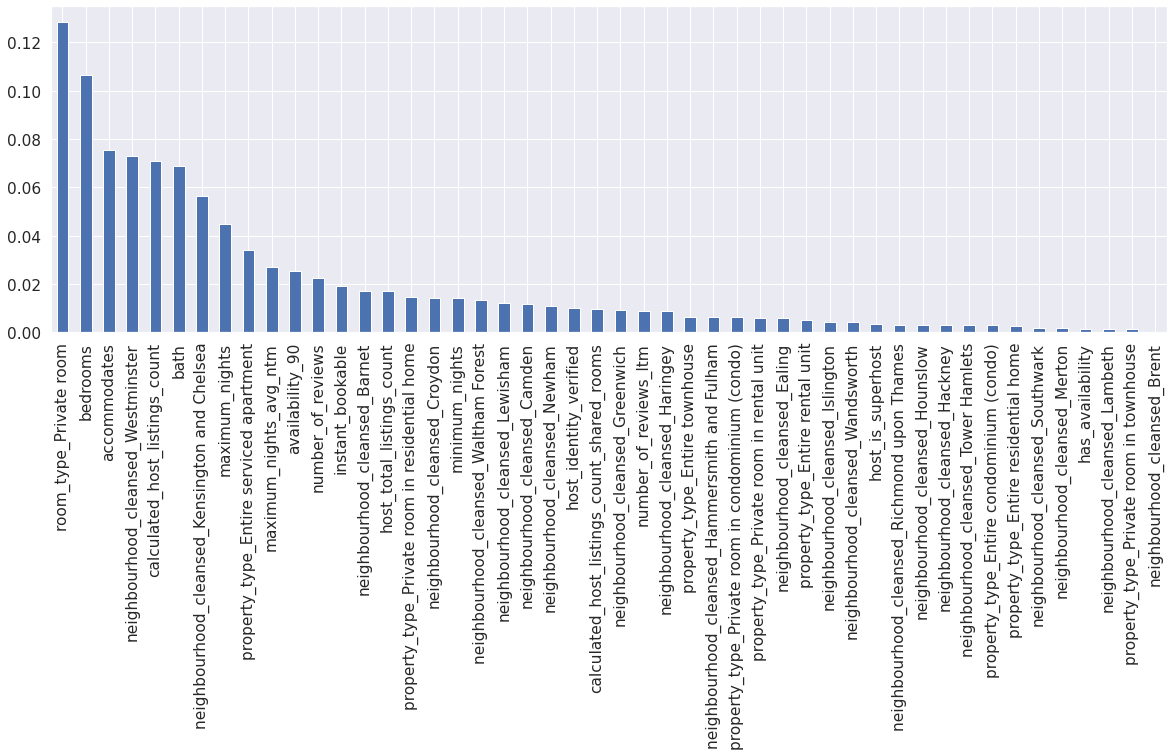

In [88]:
# the second step consist of deriving the importance of 
# each feature and ranking them from the least to the most
# important

# get feature name and importance
features = pd.Series(model_all_features.feature_importances_)
features.index = X_train.columns

# sort the features by importance
features.sort_values(ascending=False, inplace=True)

# plot
features.plot.bar(figsize=(20,6))

In [89]:
# view the list of ordered features
features = list(features.index)
features

['room_type_Private room',
 'bedrooms',
 'accommodates',
 'neighbourhood_cleansed_Westminster',
 'calculated_host_listings_count',
 'bath',
 'neighbourhood_cleansed_Kensington and Chelsea',
 'maximum_nights',
 'property_type_Entire serviced apartment',
 'maximum_nights_avg_ntm',
 'availability_90',
 'number_of_reviews',
 'instant_bookable',
 'neighbourhood_cleansed_Barnet',
 'host_total_listings_count',
 'property_type_Private room in residential home',
 'neighbourhood_cleansed_Croydon',
 'minimum_nights',
 'neighbourhood_cleansed_Waltham Forest',
 'neighbourhood_cleansed_Lewisham',
 'neighbourhood_cleansed_Camden',
 'neighbourhood_cleansed_Newham',
 'host_identity_verified',
 'calculated_host_listings_count_shared_rooms',
 'neighbourhood_cleansed_Greenwich',
 'number_of_reviews_ltm',
 'neighbourhood_cleansed_Haringey',
 'property_type_Entire townhouse',
 'neighbourhood_cleansed_Hammersmith and Fulham',
 'property_type_Private room in condominium (condo)',
 'property_type_Private room 

In [90]:

#fitting the data
from xgboost import XGBRegressor
regressor1 = xgb.XGBRegressor(learning_rate =0.1,
              n_estimators=200,
              max_depth=5,
              min_child_weight=2,
              gamma=0.1,
              subsample=0.9,
              colsample_bytree=0.8,
              objective= 'reg:linear',random_state=42,
              nthread=6,
              scale_pos_weight=1,
              seed=27,verbosity=1)#tuning the parameters
regressor1.fit(X_train, y_train)

[18:29:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(colsample_bytree=0.8, gamma=0.1, max_depth=5, min_child_weight=2,
             n_estimators=200, nthread=6, random_state=42, seed=27,
             subsample=0.9)

In [91]:
y_pred=regressor1.predict(X_test)

In [92]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
print(regressor1.score(X_train, y_train))
MSE = mean_squared_error(y_test, y_pred)
print(MSE)
rmse=MSE**(0.5)
print(rmse)
r2= r2_score(y_test, y_pred)
print(r2)

0.7123567635615792
5406.892659782166
73.53157593702291
0.649100443524614


Recursive elimination using XGBoost Regressor

In [93]:
# the final step consists in removing one at a time
# all the features, from the least to the most
# important, and build an xgboost at each round.

# once we build the model, we calculate the new r2
# if the new r2 is smaller than the original one
# (with all the features), then that feature that was removed
# was important, and we should keep it.
# otherwise, we should remove the feature

# recursive feature elimination:

# first we arbitrarily set the drop in r2
# if the drop is below this threshold,
# the feature will be removed
tol = 0.001

print('doing recursive feature elimination')

# we initialise a list where we will collect the
# features we should remove
features_to_remove = []

# set a counter to know how far ahead the loop is going
count = 1

# now we loop over all the features, in order of importance:
# remember that features is the list of ordered features
# by importance
for feature in features:
    print()
    print('testing feature: ', feature, ' which is feature ', count,
          ' out of ', len(features))
    count = count + 1

    # initialise model
    model_int = xgb.XGBRegressor(learning_rate =0.1,
              n_estimators=200,
              max_depth=5,
              min_child_weight=2,
              gamma=0.1,
              subsample=0.85,
              colsample_bytree=0.8,
              objective= 'reg:linear',random_state=42,
              nthread=4,
              scale_pos_weight=1,
              seed=27,verbosity=1)

    # fit model with all variables minus the removed features
    # and the feature to be evaluated
    model_int.fit(
        X_train.drop(features_to_remove + [feature], axis=1), y_train)

    # make a prediction over the test set
    y_pred_test = model_int.predict(
        X_test.drop(features_to_remove + [feature], axis=1))

    # calculate the new r2
    r2_score_int = r2_score(y_test, y_pred_test)
    print('New Test r2 = {}'.format((r2_score_int)))

    # print the original r2 with all the features
    print('All features Test r2 = {}'.format((r2_score_all)))

    # determine the drop in the r2
    diff_r2 = r2_score_all - r2_score_int

    # compare the drop in r2 with the tolerance
    # we set previously
    if diff_r2 >= tol:
        print('Drop in r2 ={}'.format(diff_r2))
        print('keep: ', feature)
        print
    else:
        print('Drop in r2 = {}'.format(diff_r2))
        print('remove: ', feature)
        print
        # if the drop in the r2 is small and we remove the
        # feature, we need to set the new r2 to the one based on
        # the remaining features
        r2_score_all = r2_score_int
        
        # and append the feature to remove to the collecting
        # list
        features_to_remove.append(feature)

# now the loop is finished, we evaluated all the features
print('DONE!!')
print('total features to remove: ', len(features_to_remove))

# determine the features to keep (those we won't remove)
features_to_keep = [x for x in features if x not in features_to_remove]
print('total features to keep: ', len(features_to_keep))

doing recursive feature elimination

testing feature:  room_type_Private room  which is feature  1  out of  48
[18:29:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
New Test r2 = 0.6506446917819289
All features Test r2 = 0.6364633115364072
Drop in r2 = -0.014181380245521624
remove:  room_type_Private room

testing feature:  bedrooms  which is feature  2  out of  48
[18:30:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
New Test r2 = 0.6390546335519275
All features Test r2 = 0.6506446917819289
Drop in r2 =0.011590058230001365
keep:  bedrooms

testing feature:  accommodates  which is feature  3  out of  48
[18:30:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
New Test r2 = 0.6415937410667428
All features Test r2 = 0.6506446917819289
Drop in r2 =0.009050950715186024
keep:  a

In [94]:
# capture the  selected features
seed_val = 1000000000
np.random.seed(seed_val)

# build initial model
final_xgb = xgb.XGBRegressor(learning_rate =0.1,
              n_estimators=200,
              max_depth=5,
              min_child_weight=2,
              gamma=0.1,
              subsample=0.85,
              colsample_bytree=0.8,
              objective= 'reg:linear',random_state=42,
              nthread=4,
              scale_pos_weight=1,
              seed=27,verbosity=1)

# fit the model with the selected features
final_xgb.fit(X_train[features_to_keep], y_train)

# make predictions
y_pred_test = final_xgb.predict(X_test[features_to_keep])

# calculate roc-auc
r2_score_final = r2_score(y_test, y_pred_test)
print('Test selected features r2 = %f' % (r2_score_final))
print('Test all features r2 = %f' % (r2_score_all))

[18:42:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Test selected features r2 = 0.649704
Test all features r2 = 0.651326


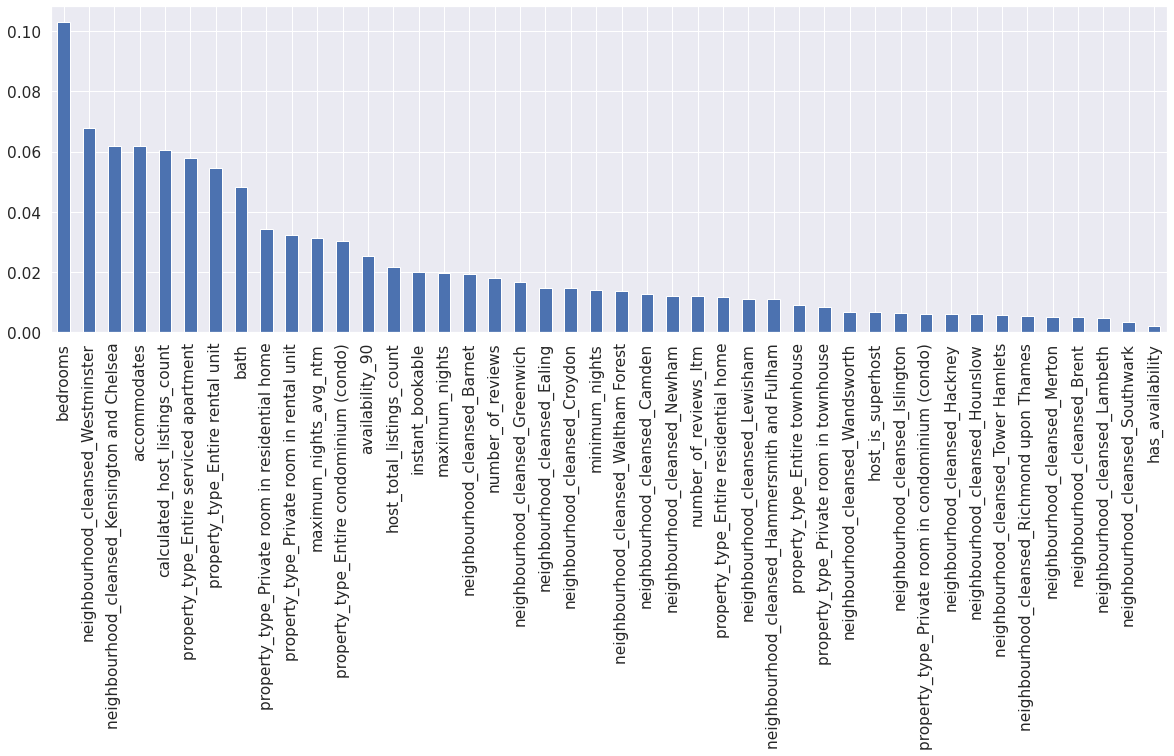

In [95]:
# the second step consist of deriving the importance of 
# each feature and ranking them from the least to the most
# important

# get feature name and importance
features = pd.Series(final_xgb.feature_importances_)
features.index = X_train[features_to_keep].columns

# sort the features by importance
features.sort_values(ascending=False, inplace=True)

# plot
features.plot.bar(figsize=(20,6))

In [96]:
# view the list of ordered features
features = list(features.index)
features

['bedrooms',
 'neighbourhood_cleansed_Westminster',
 'neighbourhood_cleansed_Kensington and Chelsea',
 'accommodates',
 'calculated_host_listings_count',
 'property_type_Entire serviced apartment',
 'property_type_Entire rental unit',
 'bath',
 'property_type_Private room in residential home',
 'property_type_Private room in rental unit',
 'maximum_nights_avg_ntm',
 'property_type_Entire condominium (condo)',
 'availability_90',
 'host_total_listings_count',
 'instant_bookable',
 'maximum_nights',
 'neighbourhood_cleansed_Barnet',
 'number_of_reviews',
 'neighbourhood_cleansed_Greenwich',
 'neighbourhood_cleansed_Ealing',
 'neighbourhood_cleansed_Croydon',
 'minimum_nights',
 'neighbourhood_cleansed_Waltham Forest',
 'neighbourhood_cleansed_Camden',
 'neighbourhood_cleansed_Newham',
 'number_of_reviews_ltm',
 'property_type_Entire residential home',
 'neighbourhood_cleansed_Lewisham',
 'neighbourhood_cleansed_Hammersmith and Fulham',
 'property_type_Entire townhouse',
 'property_type_P